# Variable respuesta


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [69]:
df = pd.read_csv("train.csv")

variables_numericas = [
'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'SalePrice'
]

df = df[variables_numericas]


#### Distribución de "SalePrice"


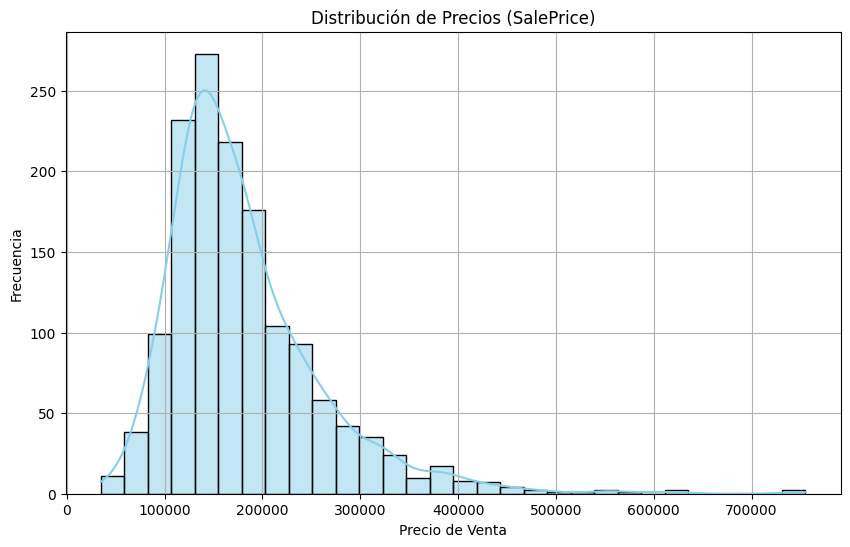

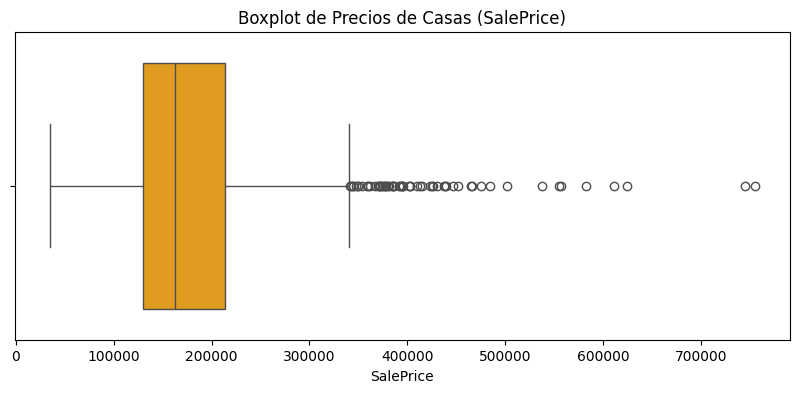

In [70]:
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], bins=30, kde=True, color='skyblue')
plt.title("Distribución de Precios (SalePrice)")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x=df['SalePrice'], color='orange')
plt.title('Boxplot de Precios de Casas (SalePrice)')
plt.show()

### Definiendo límites por categoría


In [198]:
p40 = df['SalePrice'].quantile(0.40)
p90 = df['SalePrice'].quantile(0.90)

print(f"Límite Económicas (p40): {p40}")
print(f"Límite Intermedias (p90): {p90}")

Límite Económicas (p40): 147000.0
Límite Intermedias (p90): 278000.0


### Clasificación de precio


In [199]:
def clasificar_precio(precio: float) -> str:
    if precio <= p40:
        return "Económica"
    elif precio <= p90:
        return "Intermedia"
    else:
        return "Cara"

df['CategoriaPrecio'] = df['SalePrice'].apply(clasificar_precio)

# Revisar conteo final
print(df['CategoriaPrecio'].value_counts())

CategoriaPrecio
Intermedia    726
Económica     589
Cara          145
Name: count, dtype: int64


### Conocer cuantas casas caen en cada categoría


C:\Users\ncast\AppData\Local\Temp\ipykernel_11884\2557847774.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CategoriaPrecio', data=df, palette='Set2')


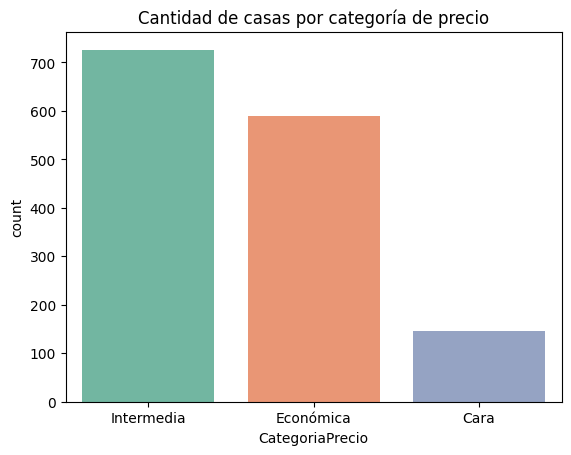

In [200]:
sns.countplot(x='CategoriaPrecio', data=df, palette='Set2')
plt.title("Cantidad de casas por categoría de precio")
plt.show()

<small>

# Clasificación de Casas según Precio - Justificación y Análisis

---

## Análisis Exploratorio de Precios

Para establecer una clasificación de las casas en **Económicas**, **Intermedias** y **Caras**, se realizó un análisis exploratorio de la variable `SalePrice`, que representa el precio de venta de cada propiedad.

### Distribución de Precios

Primero, se generaron dos gráficos para comprender la distribución general:

- Un **histograma**, que muestra cómo se distribuyen los precios.
- Un **boxplot**, que permite visualizar valores atípicos y entender mejor los rangos típicos de precios.

### Principales Hallazgos

- La distribución de precios es claramente **asimétrica positiva**: hay muchas casas con precios más bajos y una cola larga hacia precios más altos.
- Se observa un grupo pequeño de casas significativamente más caras, que se comportan como **outliers**.
- El mayor volumen de casas se concentra entre aproximadamente **100,000 y 200,000**, mientras que las casas más costosas se encuentran por arriba de los **278,000**.

---

## Definición de Límites para la Clasificación

Con base en esta distribución, se decidió utilizar **percentiles** como criterio para dividir las categorías, asegurando que el corte sea **objetivo** y refleje la estructura real de los datos. Los percentiles elegidos fueron:

- **p40 (percentil 40)**: Este límite superior define las casas **Económicas**. Se ubica en un precio de **147,000**, lo cual cubre el rango donde se concentra gran parte de las casas más accesibles.
- **p90 (percentil 90)**: Define el límite superior de las casas **Intermedias**. Por encima de este valor (278,000), las casas son consideradas **Caras**. Este corte refleja el segmento premium del mercado, capturando el 10% más costoso de las propiedades.

---

## Límites Finales

| Categoría   | Rango de Precio                 |
| ----------- | ------------------------------- |
| Económicas  | Precio ≤ 147,000                |
| Intermedias | 147,000 <small Precio ≤ 278,000 |
| Caras       | Precio > 278,000                |

---

## Análisis de Resultados

### Distribución de las Categorías

| Categoría   | Cantidad de Casas |
| ----------- | ----------------- |
| Económicas  | 589               |
| Intermedias | 726               |
| Caras       | 145               |

---

### Validación Visual

Para evaluar si esta clasificación es **coherente con la realidad de las propiedades**, se generaron gráficos adicionales:

- Un **conteo de casas por categoría**, que muestra una mayor concentración de casas en los segmentos económicos e intermedios, y una proporción menor de casas caras, lo cual es lógico en un mercado inmobiliario real.

---

## Conclusión

La variable `CategoriaPrecio`, creada a partir del análisis exploratorio, logra segmentar el mercado inmobiliario en categorías **coherentes, interpretables y alineadas con la realidad del mercado**.

- La construcción de esta variable no se basó en suposiciones arbitrarias, sino en un **proceso fundamentado en el comportamiento real de los precios de venta**, lo que garantiza que las categorías reflejan verdaderamente la estructura del mercado.
- La combinación del análisis de distribución, el uso de percentiles estratégicos (p40 y p90) y la validación gráfica permiten asegurar que cada categoría (Económica, Intermedia, Cara) representa un segmento específico y relevante dentro de los datos analizados.

En términos prácticos, esta variable `CategoriaPrecio` es más que una simple agrupación de precios:

- Facilita el desarrollo de modelos predictivos de clasificación que podrían anticipar el segmento al que pertenece una propiedad, con base en sus características.
- Permite realizar estudios de mercado enfocados en entender mejor el perfil de cada categoría.
- Sirve como base para identificar patrones de comportamiento en la oferta inmobiliaria, comparando características clave entre categorías.

</small>


# Creación de Árbol de Clasificación


In [201]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.compose import make_column_selector as selector

In [202]:
variables_predictoras = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces'
]

X = df[variables_predictoras]
y = df['CategoriaPrecio']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [204]:
arbol = DecisionTreeClassifier(random_state=42)

# Ajustar directamente al entrenamiento
arbol.fit(X_train, y_train)

# Predicciones
y_pred = arbol.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.82


Reporte de Clasificación:
              precision    recall  f1-score   support

        Cara       0.74      0.69      0.71        45
   Económica       0.83      0.87      0.85       189
  Intermedia       0.81      0.79      0.80       204

    accuracy                           0.82       438
   macro avg       0.79      0.78      0.79       438
weighted avg       0.81      0.82      0.81       438



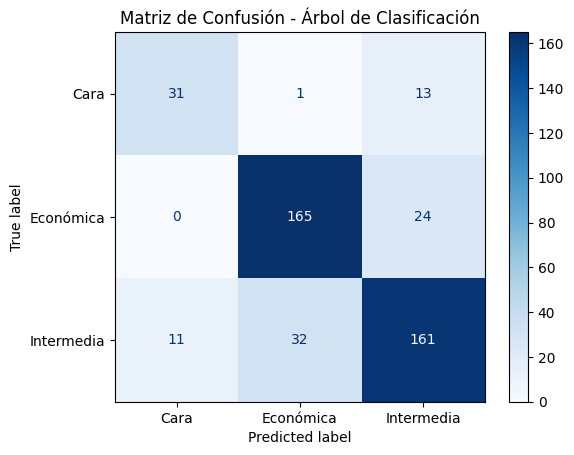

In [205]:
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Árbol de Clasificación')
plt.show()

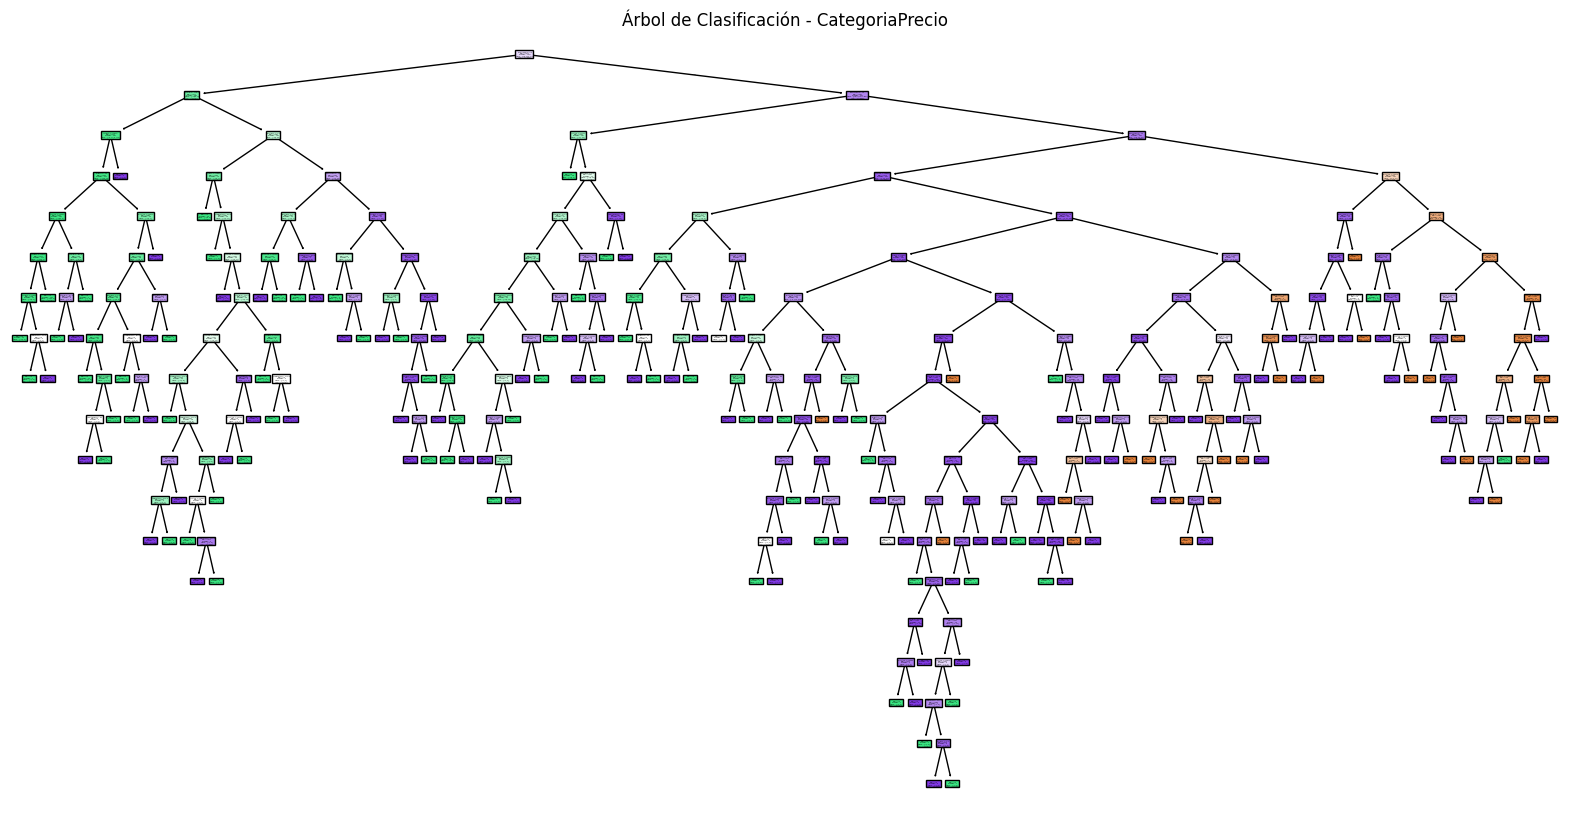

In [206]:
plt.figure(figsize=(20, 10))
plot_tree(arbol, feature_names=variables_predictoras, class_names=arbol.classes_, filled=True)
plt.title("Árbol de Clasificación - CategoriaPrecio")
plt.show()

<small>

# Análisis de Resultados - Árbol de Clasificación

---

Se elaboró un **árbol de clasificación** para predecir la categoría de precio de cada casa (**Económica, Intermedia o Cara**) utilizando como variable respuesta `CategoriaPrecio`, creada previamente a partir del análisis exploratorio de `SalePrice`.

Es importante resaltar que **el precio de venta (`SalePrice`) no fue utilizado como predictor** para entrenar el modelo, cumpliendo con la indicación de basarse únicamente en las demás características físicas y estructurales de las casas.

---

## Métricas de Evaluación

El modelo fue evaluado utilizando un conjunto de prueba (30% de los datos), obteniendo los siguientes resultados:

- **Precisión global (accuracy):** 0.82  
  Esto significa que el modelo predice correctamente la categoría de precio en el **82%** de los casos, lo cual es un desempeño bastante aceptable para un primer modelo de clasificación.

### Reporte de Clasificación por Categoría

| Categoría      | Precision | Recall | F1-Score | Soporte |
| -------------- | --------- | ------ | -------- | ------- |
| **Cara**       | 0.74      | 0.69   | 0.71     | 45      |
| **Económica**  | 0.83      | 0.87   | 0.85     | 189     |
| **Intermedia** | 0.81      | 0.79   | 0.80     | 204     |

---

## Análisis e Interpretación de Métricas

- **Precisión:** De todas las casas que el modelo clasificó como "Cara", el 74% realmente pertenecen a esta categoría. El modelo es más confiable clasificando casas económicas e intermedias, donde alcanza una precisión superior al 80%.
- **Recall:** De todas las casas que realmente son "Caras", el modelo identifica correctamente el 69%. Esto muestra que el modelo tiene cierta dificultad para distinguir correctamente las propiedades más costosas, lo cual es razonable ya que muchas de ellas pueden compartir características físicas con casas intermedias.
- **F1-Score:** Este balance entre precisión y recall muestra que, en términos generales, el desempeño es sólido en todas las categorías, especialmente para las casas **económicas e intermedias**, que son las que predominan en el dataset.

---

## Análisis Gráfico

### Matriz de Confusión

La matriz de confusión muestra cómo se distribuyen los aciertos y errores de clasificación:

- **Casas Económicas e Intermedias:** Son las categorías con mejor desempeño, ya que se clasifican correctamente en la mayoría de los casos.
- **Casas Caras:** Es la categoría más difícil de identificar correctamente, con algunos casos siendo clasificados como intermedios. Esto es esperable, ya que algunas casas caras comparten características físicas con casas intermedias, lo cual puede confundir al modelo.

---

### Visualización del Árbol de Clasificación

El diagrama del árbol muestra las reglas de decisión aprendidas por el modelo. Estas reglas se basan principalmente en variables como:

- `OverallQual` (Calidad General de la Construcción)
- `GrLivArea` (Área Habitable)
- `GarageCars` (Número de Coches en el Garaje)
- `YearBuilt` (Año de Construcción)

El árbol divide iterativamente los datos usando estas características, buscando la mejor forma de separar las categorías de precio.

---

## Conclusión

El modelo de **árbol de clasificación** demuestra que es posible predecir la categoría de precio de una casa con un **buen nivel de precisión** (82%), utilizando únicamente sus características físicas y estructurales.

Esto valida que la variable `CategoriaPrecio` es una clasificación **coherente y significativa**, ya que está fuertemente relacionada con las características físicas y de calidad de las viviendas.

Esta variable y el modelo resultante son herramientas útiles para:

- Predicción automatizada de la categoría de precio de una casa, apoyando procesos de tasación o evaluación rápida.
- Segmentación de mercado inmobiliario, identificando patrones en cada categoría.
- Análisis exploratorio en estudios de oferta y demanda inmobiliaria, facilitando la comparación entre segmentos de viviendas.

</small>
